In [122]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [123]:
data = pd.read_csv("coupons.csv")
data.head()

,CustomerId,PostedOn
0,1157560,2/1/2020 0:01
1,1191514,2/1/2020 0:01
2,353380,2/1/2020 0:03
3,511527,2/1/2020 0:03
4,511527,2/1/2020 0:04


In [124]:
data['PostedOn'] = pd.to_datetime(data['PostedOn'])

In [125]:
data.head()

,CustomerId,PostedOn
0,1157560,2020-02-01 00:01:00
1,1191514,2020-02-01 00:01:00
2,353380,2020-02-01 00:03:00
3,511527,2020-02-01 00:03:00
4,511527,2020-02-01 00:04:00


In [126]:
data['PostedOn'] = data['PostedOn'].dt.date
data.head()

,CustomerId,PostedOn
0,1157560,2020-02-01
1,1191514,2020-02-01
2,353380,2020-02-01
3,511527,2020-02-01
4,511527,2020-02-01


In [127]:
data['Count'] = 1
data.head()

,CustomerId,PostedOn,Count
0,1157560,2020-02-01,1
1,1191514,2020-02-01,1
2,353380,2020-02-01,1
3,511527,2020-02-01,1
4,511527,2020-02-01,1


In [128]:
del data['CustomerId']
data.columns=['Date','Count']
data.head()

,Date,Count
0,2020-02-01,1
1,2020-02-01,1
2,2020-02-01,1
3,2020-02-01,1
4,2020-02-01,1


In [129]:
data.head()

,Date,Count
0,2020-02-01,1
1,2020-02-01,1
2,2020-02-01,1
3,2020-02-01,1
4,2020-02-01,1


In [130]:
data = data.groupby([data['Date']]).sum()

In [131]:
data.head()
df = data.copy()
df1 = data.copy()

In [132]:
data.describe(include='all')

,Count
count,146.000000
mean,564.479452
std,470.139234
min,19.000000
25%,163.000000
50%,399.000000
75%,1107.250000
max,1572.000000


In [133]:
data.shape

(146, 1)

In [134]:
data.describe()

,Count
count,146.000000
mean,564.479452
std,470.139234
min,19.000000
25%,163.000000
50%,399.000000
75%,1107.250000
max,1572.000000


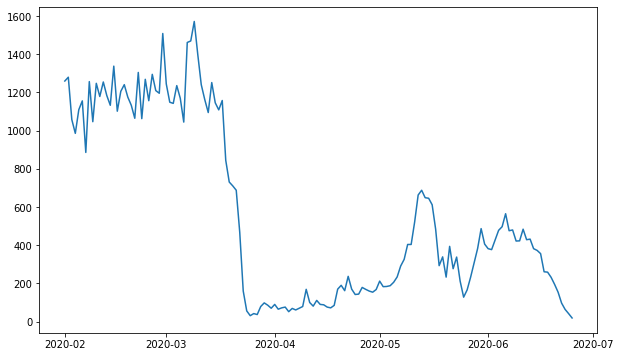

In [135]:
plt.plot(data)

# ARIMA MODEL

C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


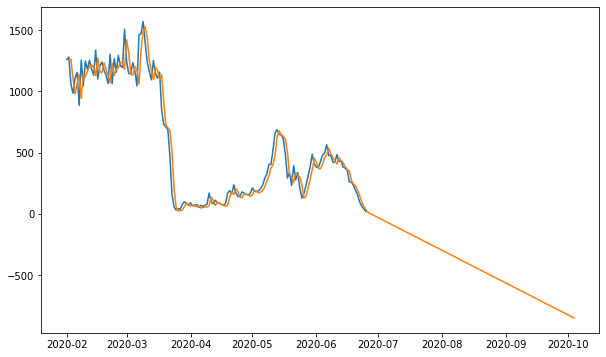

In [136]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data['Count'], order=(1, 1, 1))
model_fit = model.fit()
yhat = model_fit.predict(1, len(data)+100, typ='levels')
pred = yhat.tolist()
# data['pred'] = pred
plt.plot(data['Count'])
plt.plot(yhat)

In [137]:
print(yhat)

2020-02-02    1251.365766
2020-02-03    1263.578256
2020-02-04    1105.333685
2020-02-05     978.816246
2020-02-06    1067.626328
                 ...     
2020-09-30    -816.552826
2020-10-01    -825.187060
2020-10-02    -833.821294
2020-10-03    -842.455528
2020-10-04    -851.089762
Freq: D, Length: 246, dtype: float64


In [138]:
data.head()

,Count
Date,
2020-02-01,1260
2020-02-02,1280
2020-02-03,1058
2020-02-04,986
2020-02-05,1110


# Simple Exponential Smoothing

In [139]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_1 = SimpleExpSmoothing(df['Count'])

C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


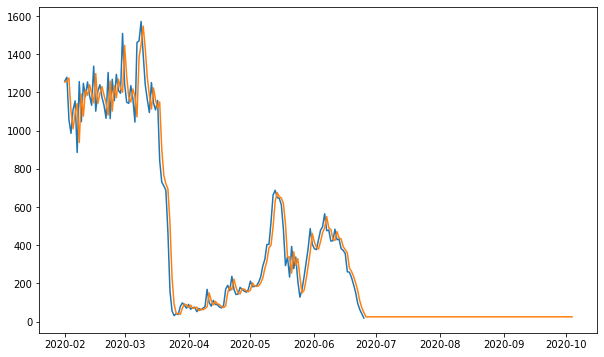

In [140]:
model_fit_1 = model_1.fit()
# make prediction
yhat = model_fit_1.predict(0,len(df)+100)
pred = yhat.tolist()
# data['pred'] = pred
plt.plot(df['Count'])
plt.plot(yhat)

In [141]:
df.tail()

,Count
Date,
2020-06-21,154
2020-06-22,97
2020-06-23,64
2020-06-24,42
2020-06-25,19


In [142]:
yhat

2020-02-01    1254.496578
2020-02-02    1258.881324
2020-02-03    1275.707226
2020-02-04    1102.253150
2020-02-05    1009.630672
                 ...     
2020-09-30      24.975951
2020-10-01      24.975951
2020-10-02      24.975951
2020-10-03      24.975951
2020-10-04      24.975951
Freq: D, Length: 247, dtype: float64

# Holt Winters Exponential Smoothing

C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


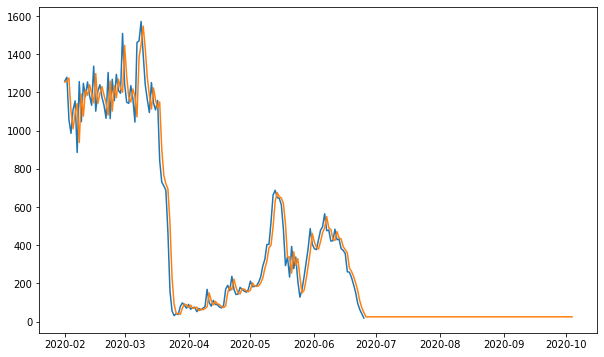

In [143]:


from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df1['Count'])

model_fit = model.fit()
# make prediction
yhat = model_fit.predict(0,len(df1)+100)
pred = yhat.tolist()
# data['pred'] = pred
plt.plot(df1['Count'])
plt.plot(yhat)

In [144]:
print(yhat)

2020-02-01    1254.496578
2020-02-02    1258.881324
2020-02-03    1275.707226
2020-02-04    1102.253150
2020-02-05    1009.630672
                 ...     
2020-09-30      24.975951
2020-10-01      24.975951
2020-10-02      24.975951
2020-10-03      24.975951
2020-10-04      24.975951
Freq: D, Length: 247, dtype: float64


In [145]:
data.tail()

,Count
Date,
2020-06-21,154
2020-06-22,97
2020-06-23,64
2020-06-24,42
2020-06-25,19


In [158]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Count'],order=(1, 1, 1),seasonal_order=(1,1,1,30))
results=model.fit()

C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Polok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


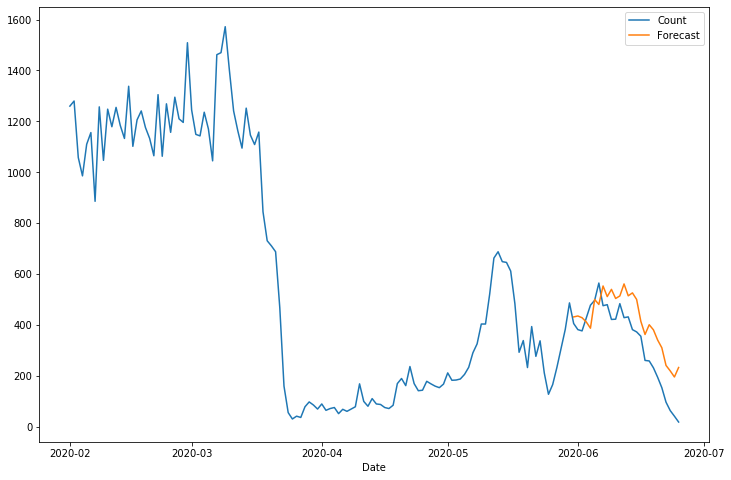

In [159]:
df['Forecast']=results.predict(start=120,end=160,dynamic=True)
df[['Count','Forecast']].plot(figsize=(12,8))

In [146]:
from fbprophet.plot import plot_plotly
from fbprophet import Prophet
import pandas as pd

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df = pd.read_csv("coupons.csv")
df.head()

In [ ]:
df['PostedOn'] = pd.to_datetime(df['PostedOn']).dt.date
df.head()

In [ ]:
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
del df['CustomerId']

In [ ]:
df['y'] = 1
df.columns = ['ds','y']
df.head()

In [ ]:
df = df.groupby([df['ds']]).sum()

In [ ]:
df.head()

In [ ]:
index = []
for i in range(0,len(df)):
    index.append(i)
df['ds'] = df.index
df.index = index

In [ ]:
index

In [ ]:
columns_titles = ["ds","y"]
df=df.reindex(columns=columns_titles)

In [ ]:
df.head()

In [ ]:
prophet_basic = Prophet()
prophet_basic.fit(df)

In [ ]:
future= prophet_basic.make_future_dataframe(periods=300)
future.head()

In [ ]:
forecast=prophet_basic.predict(future)

In [ ]:
fig1 =prophet_basic.plot(forecast)

In [ ]:
fig1 = prophet_basic.plot_components(forecast)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [ ]:
prophet_basic.changepoints

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=False)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.5)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [ ]:
df.shape